# **A Marketer's Guide to NLP: How Machines Actually Process and Understand Language**
by: Joe Domaleski
date: October 19, 2025

Here's a Python notebook I used to run code for my recent blog post "A Marketer's Guide to NLP: How Machines Actually Process and Understand Language". I ran it using Google Colab, but it should work as a Jupyter Notebook as well.


**From section 3. How Machines Break Down Language: The Building Blocks of NLP**

Tokenization example.

In [ ]:
text = "Marketing is both art and science."
text.split()

['Marketing', 'is', 'both', 'art', 'and', 'science.']

**From section 3. How Machines Break Down Language: The Building Blocks of NLP**

Stop word removal example.

In [ ]:
# Install NLTK (only needed the first time)
!pip install nltk

# Download the necessary resources (only needed once)
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "Marketing is both art and science."
tokens = word_tokenize(text)

filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words("english")]

print(filtered_tokens)

['Marketing', 'art', 'science', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**From section 3. How Machines Break Down Language: The Building Blocks of NLP**

Stemming and Lemmatization example.







In [9]:
# Stemming vs Lemmatization example in Python
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")

words = ["running", "ran", "runs"]

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print("Stemming:")
print([stemmer.stem(word) for word in words])

print("Lemmatization:")
print([lemmatizer.lemmatize(word, pos="v") for word in words])  # pos="v" = treat words as verbs

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemming:
['run', 'ran', 'run']
Lemmatization:
['run', 'run', 'run']


[nltk_data]   Package omw-1.4 is already up-to-date!


**From Section 4. Measuring Word Importance: Bag-of-Words and TF-IDF**

Bag-of-words example.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Marketing is both art and science.",
    "Marketing strategy uses data and marketing research to improve decisions."
]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(bow_matrix.toarray())

['and' 'art' 'both' 'data' 'decisions' 'improve' 'is' 'marketing'
 'research' 'science' 'strategy' 'to' 'uses']
[[1 1 1 0 0 0 1 1 0 1 0 0 0]
 [1 0 0 1 1 1 0 2 1 0 1 1 1]]


**From Section 4. Measuring Word Importance: Bag-of-Words and TF-IDF**

TF-IDF example.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Marketing is both art and science.",
    "Marketing strategy uses data and marketing research to improve decisions."
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())  # Words in column order
print(tfidf_matrix.toarray())             # Importance scores in same order

['and' 'art' 'both' 'data' 'decisions' 'improve' 'is' 'marketing'
 'research' 'science' 'strategy' 'to' 'uses']
[[0.31779954 0.44665616 0.44665616 0.         0.         0.
  0.44665616 0.31779954 0.         0.44665616 0.         0.
  0.        ]
 [0.23046538 0.         0.         0.32391104 0.32391104 0.32391104
  0.         0.46093075 0.32391104 0.         0.32391104 0.32391104
  0.32391104]]


**From section 5. From Counting Words to Understanding Meaning: Word Embeddings**

Gensim word embedding example.

In [ ]:
# Install Gensim (only needed the first time)
!pip install gensim

# Load a small pre-trained embedding model
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")  # ~128MB, fast and good for demos

# 1) Basic similarity checks
pairs = [
    ("buy", "purchase"),
    ("refund", "complaint"),
    ("happy", "joyful"),
    ("happy", "furious"),
    ("marketing", "advertising"),
    ("marketing", "banana"),
]

for a, b in pairs:
    print(f"similarity({a}, {b}) = {model.similarity(a, b):.3f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 67.5 MB/s eta 0:00:00
[==================================================] 100.0% 128.1/128.1MB downloaded
similarity(buy, purchase) = 0.833
similarity(refund, complaint) = 0.341
similarity(happy, joyful) = 0.526
similarity(happy, furious) = 0.437
similarity(marketing, advertising) = 0.819
similarity(marketing, banana) = 0.229


**From section 5. From Counting Words to Understanding Meaning: Word Embeddings**

K Nearest neighbors (knn) example.

In [ ]:
# Find nearest neighbors for key marketing terms
print("Most similar to 'refund':")
for word, score in model.most_similar("refund", topn=5):
    print(f"  {word:12s} {score:.3f}")

print("\nMost similar to 'buy':")
for word, score in model.most_similar("buy", topn=5):
    print(f"  {word:12s} {score:.3f}")

Most similar to 'refund':
  refunds      0.848
  payment      0.711
  refunded     0.673
  rebate       0.655
  fees         0.641

Most similar to 'buy':
  sell         0.938
  purchase     0.833
  bought       0.776
  buying       0.773
  acquire      0.761


**From section 5. From Counting Words to Understanding Meaning: Word Embeddings**

Analogy using classic king-man-queen-woman example.

In [ ]:
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=5)
print("\nAnalogy example: king - man + woman ≈ ?")
for word, score in result:
    print(f"  {word:12s} {score:.3f}")


Analogy example: king - man + woman ≈ ?
  queen        0.770
  monarch      0.684
  throne       0.676
  daughter     0.659
  princess     0.652


**From Section 6. Finding Themes at Scale: Topic Modeling using LDA**

LDA topic model example.

In [10]:
# Install dependencies (only needed the first time)
!pip install gensim nltk

# Imports and setup
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim import corpora, models

stop_words = set(stopwords.words("english"))

# Example social posts about a brand
docs = [
    "The checkout page is slow and the app froze during payment",
    "Love the new update, the UI feels clean and fast",
    "Support took forever to answer and I still need a refund",
    "Marketing email was helpful and I decided to buy today",
    "Shipping was delayed and tracking never updated",
    "Great product quality, I recommended it to friends",
    "The return process is confusing and the policy is hard to find",
    "I like the price point, the value seems great for what you get",
    "Customer service was friendly but did not solve my issue",
    "The mobile site loads slowly and the cart kept emptying"
]

# Very light preprocessing
def tokenize(text):
    tokens = simple_preprocess(text, deacc=True)  # lowercase, remove punctuation
    return [t for t in tokens if t not in stop_words and len(t) > 2]

tokenized_docs = [tokenize(d) for d in docs]

# Build dictionary and bag-of-words corpus
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

# Train a tiny LDA model (choose the number of topics)
num_topics = 3
lda = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=15,
    alpha="auto",
    eta="auto",
)

# Show the learned topics
for i, topic in lda.show_topics(num_topics=num_topics, num_words=6, formatted=False):
    words = ", ".join([w for w, _ in topic])
    print(f"Topic {i}: {words}")

Topic 0: great, checkout, payment, slow, froze, app
Topic 1: hard, return, policy, confusing, friendly, find
Topic 2: update, fast, love, clean, feels, new


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**From Section 7. Grouping Similar Messages: Document Clustering with K-Means**

k-means clustering example.

In [11]:
!pip -q install sentence-transformers scikit-learn

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

docs = [
    "The checkout page is slow and the app froze during payment",
    "Love the new update, the UI feels clean and fast",
    "Support took forever to answer and I still need a refund",
    "Marketing email was helpful and I decided to buy today",
    "Shipping was delayed and tracking never updated",
    "Great product quality, I recommended it to friends",
    "The return process is confusing and the policy is hard to find",
    "I like the price point, the value seems great for what you get",
    "Customer service was friendly but did not solve my issue",
    "The mobile site loads slowly and the cart kept emptying"
]

# Embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(docs, normalize_embeddings=True)

# K-means (k=3)
k = 3
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Show example documents by cluster
for i in range(k):
    print(f"\nCluster {i}")
    for j, d in enumerate(docs):
        if labels[j] == i:
            print(" -", d)


Cluster 0
 - Support took forever to answer and I still need a refund
 - Marketing email was helpful and I decided to buy today
 - Shipping was delayed and tracking never updated
 - The return process is confusing and the policy is hard to find
 - Customer service was friendly but did not solve my issue

Cluster 1
 - Love the new update, the UI feels clean and fast
 - Great product quality, I recommended it to friends
 - I like the price point, the value seems great for what you get

Cluster 2
 - The checkout page is slow and the app froze during payment
 - The mobile site loads slowly and the cart kept emptying


**From Section 7. Grouping Similar Messages: Document Clustering with K-Means**

k-means clustering example part 2 - plot using PCA.

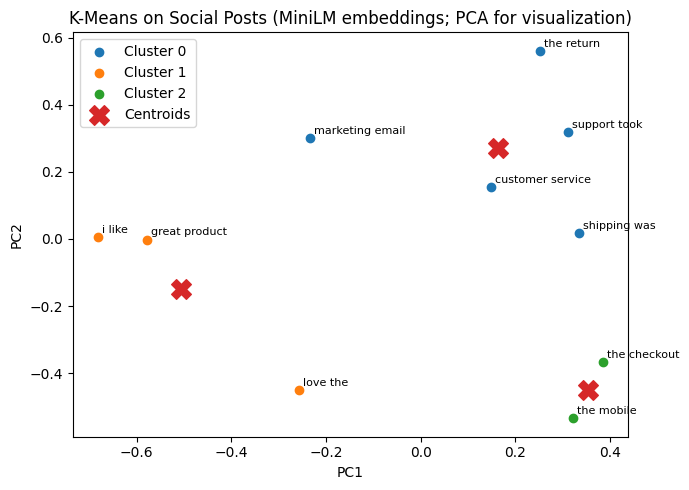

In [12]:
# 2D projection for visualization (clustering already done in full space)
pca = PCA(n_components=2, random_state=42)
pts_2d = pca.fit_transform(embeddings)
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Simple helper to make short labels for each sentence
def short_label(text, n=2):
    return " ".join(text.split()[:n]).lower().rstrip(",.:;")

plt.figure(figsize=(7,5))
for i in range(k):
    mask = labels == i
    plt.scatter(pts_2d[mask,0], pts_2d[mask,1], label=f"Cluster {i}")
    # annotate a few points in each cluster
    for idx in np.where(mask)[0]:
        plt.annotate(short_label(docs[idx]), (pts_2d[idx,0], pts_2d[idx,1]), fontsize=8,
                     textcoords="offset points", xytext=(3,3))

plt.scatter(centroids_2d[:,0], centroids_2d[:,1], marker="X", s=200, label="Centroids")
plt.title("K-Means on Social Posts (MiniLM embeddings; PCA for visualization)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.tight_layout()
plt.show()

**From Section 8. Teaching the Machine to Label Text: Supervised NLP Classification**

Sentiment analysis using VADER example.

In [6]:
# Install once in a new notebook
!pip -q install nltk

# Imports and setup
import nltk
nltk.download("vader_lexicon")

from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Same social posts as earlier
docs = [
    "The checkout page is slow and the app froze during payment",
    "Love the new update, the UI feels clean and fast",
    "Support took forever to answer and I still need a refund",
    "Marketing email was helpful and I decided to buy today",
    "Shipping was delayed and tracking never updated",
    "Great product quality, I recommended it to friends",
    "The return process is confusing and the policy is hard to find",
    "I like the price point, the value seems great for what you get",
    "Customer service was friendly but did not solve my issue",
    "The mobile site loads slowly and the cart kept emptying"
]

sia = SentimentIntensityAnalyzer()

def label_from_compound(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

results = []
for d in docs:
    scores = sia.polarity_scores(d)
    label = label_from_compound(scores["compound"])
    results.append({"text": d, **scores, "label": label})

# Print per-post results
for r in results:
    print(f"[{r['label']}] {r['compound']:.3f}  {r['text']}")

# Simple summary
labels = [r["label"] for r in results]
unique, counts = np.unique(labels, return_counts=True)
print("\nLabel counts:", dict(zip(unique, counts)))

avg_compound = np.mean([r["compound"] for r in results])
print("Average compound score:", round(avg_compound, 3))

[neutral] 0.000  The checkout page is slow and the app froze during payment
[positive] 0.784  Love the new update, the UI feels clean and fast
[positive] 0.402  Support took forever to answer and I still need a refund
[positive] 0.421  Marketing email was helpful and I decided to buy today
[negative] -0.226  Shipping was delayed and tracking never updated
[positive] 0.840  Great product quality, I recommended it to friends
[negative] -0.318  The return process is confusing and the policy is hard to find
[positive] 0.840  I like the price point, the value seems great for what you get
[positive] 0.055  Customer service was friendly but did not solve my issue
[negative] -0.153  The mobile site loads slowly and the cart kept emptying

Label counts: {np.str_('negative'): np.int64(3), np.str_('neutral'): np.int64(1), np.str_('positive'): np.int64(6)}
Average compound score: 0.265


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**From Section 9. The Modern Breakthrough: Neural Networks and Transformers for NLP**

Summarization example using DistilBART and PyTorch

In [8]:
# Install once in a new notebook
!pip -q install transformers torch sentencepiece

from transformers import pipeline

# Use a compact, fast summarization model
summarizer = pipeline(
    task="summarization",
    model="sshleifer/distilbart-cnn-12-6",  # small DistilBART CNN model
    framework="pt"  # use PyTorch backend
)

text = """
Our team analyzed thousands of customer comments about the fall product line across email, support tickets,
and social media. People love the updated UI and faster load times. The most common complaints were around
shipping delays and the return policy being hard to find. A smaller but vocal group mentioned pricing
confusion during checkout, especially on mobile. We also saw growing interest in the new “starter” bundle,
which performed well with first-time buyers and gift purchasers. Overall sentiment trended positive,
but operational issues like delivery and returns caused friction for repeat customers.
"""

summary = summarizer(
    text,
    max_length=110,  # upper bound for summary length (in tokens)
    min_length=45,   # lower bound to avoid ultra-short summaries
    do_sample=False  # deterministic output
)[0]["summary_text"]

print(summary)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


 Our team analyzed thousands of customer comments about the fall product line across email, support tickets, and social media . People love the updated UI and faster load times . The most common complaints were around shipping delays and the return policy being hard to find .
